# Part 1

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(5432)

In [49]:
def activation_function(s):
    return 60 * (1 + np.tanh(s))

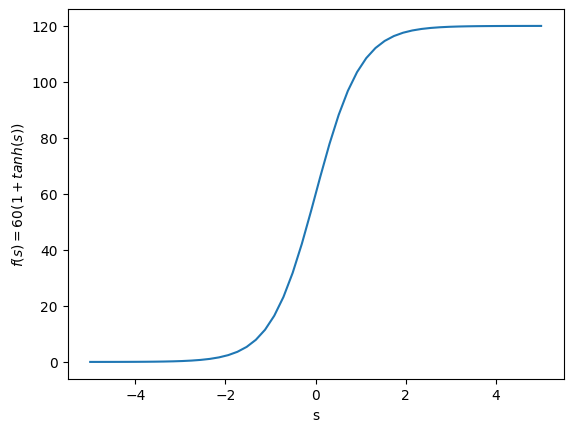

In [50]:
s = np.linspace(-5, 5)
plt.xlabel("s")
plt.ylabel("$f(s)=60(1+tanh(s))$")
plt.plot(s, activation_function(s))
plt.show()

In [51]:
omega = 0.05
I = -3
def f(t, y):
    return -y + activation_function(omega * y + I)

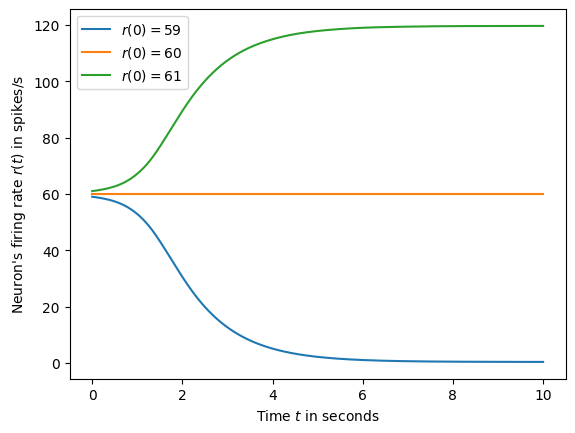

In [64]:
t0 = 0
tf = 10
for r0 in [59, 60, 61]:
    sol = solve_ivp(f, [t0, tf], [r0], vectorized = True, dense_output=True)
    t = np.linspace(0, 10, num=1000)
    plt.plot(t, sol.sol(t)[0], label="$r(0)={}$".format(r0))
plt.xlabel("Time $t$ in seconds")
plt.ylabel("Neuron's firing rate $r(t)$ in spikes/s")
plt.legend()
plt.show()

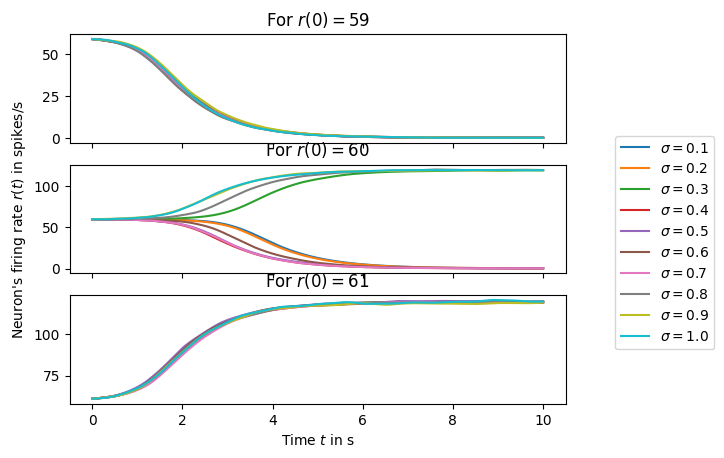

In [70]:
sigma = 0.3
def f_with_noise(sigma):
    return lambda t, y: -y + activation_function(omega * y + I) + sigma * np.random.normal()

t0 = 0
tf = 10
fig, axs = plt.subplots(3, sharex=True)
for i, r0 in enumerate([59, 60, 61]):
    for sigma in np.linspace(0.1, 1, num=10):
        sol = solve_ivp(f_with_noise(sigma), [t0, tf], [r0], vectorized = True, dense_output=True)
        t = np.linspace(0, 10, num=1000)
        axs[i].plot(t, sol.sol(t)[0], label="$\\sigma={:.2}$".format(sigma))
    axs[i].set_title("For $r(0)={}$".format(r0))
    
plt.xlabel("Time $t$ in s")
# I love hacks. We can't use plt.ylabel() as it place the label on the last subfigure,
# not in the center.
axs[1].set_ylabel("Neuron's firing rate $r(t)$ in spikes/s")
plt.legend(loc=(1.1,0.5))
plt.show()

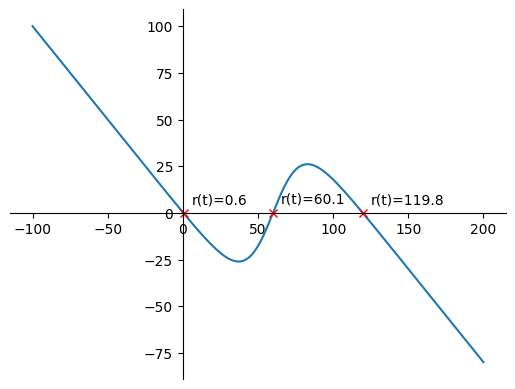

In [97]:
def deriv(r):
    return -r + activation_function(omega * r + I)

r = np.linspace(-100, 200, num=1000)
y = deriv(r)
fig, ax = plt.subplots()
ax.plot(r, y)

for i in range(1, len(y) - 1):
    if y[i] * y[i-1] <= 0:
        ax.plot([r[i]], [y[i]], "xr")
        ax.text(r[i] + 5, y[i] + 5, "r(t)={:.1f}".format(r[i]))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.show()

In [98]:
def count_zeros(y):
    cpt = 0
    for i in range(1, len(y) - 1):
        if y[i] * y[i-1] <= 0:
            cpt += 1
    return cpt

[1. 3.]


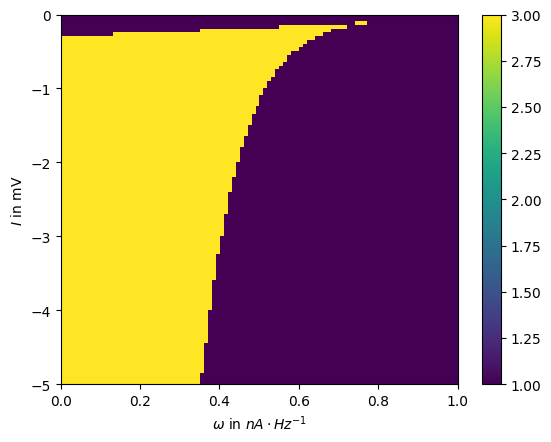

In [111]:
zeros = np.zeros((100, 100))
for i, omega in enumerate(np.linspace(0, 1, num=100)):
    for j, I in enumerate(np.linspace(-5, 0, num=100)):
        def deriv(r):
            return -r + activation_function(omega * r + I)
        
        r = np.linspace(-100, 200, num=1000)
        y = deriv(r)
        zeros[i][j] = count_zeros(y)

print(np.unique(zeros))
plt.imshow(zeros, extent=(0, 1, -5, 0), aspect='auto')
plt.colorbar()
plt.xlabel("$\\omega$ in $nA\\cdot Hz^{-1}$")
plt.ylabel("$I$ in mV")
plt.show()